In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from utils.global_params import n_folds

### Arguments

In [3]:
subject = 'F'
voxel_num = 500
loss_type = 'Train'

In [4]:
def collect_mlp_losses(n_folds, encoding_model, subject, voxel_num, loss_type):
    fold_losses = []
    for fold in range(n_folds):
        curr_fold_losses = np.load("{}/mlp_fold_{}_losses/subject_{}/fold_{}.npy".format(encoding_model, loss_type, subject, fold))
        curr_fold_losses = curr_fold_losses[voxel_num]
        fold_losses.append(curr_fold_losses)
    fold_losses = np.array(fold_losses)
    return fold_losses

In [5]:
X = np.arange(1,11)
mlp_initial_losses = collect_mlp_losses(n_folds, 'mlp_initial', subject, voxel_num, loss_type)
mlp_smallerhiddensize_losses = collect_mlp_losses(n_folds, 'mlp_smallerhiddensize', subject, voxel_num, loss_type)
mlp_largerhiddensize_losses = collect_mlp_losses(n_folds, 'mlp_largerhiddensize', subject, voxel_num, loss_type)
mlp_additionalhiddenlayer_losses = collect_mlp_losses(n_folds, 'mlp_additionalhiddenlayer', subject, voxel_num, loss_type)

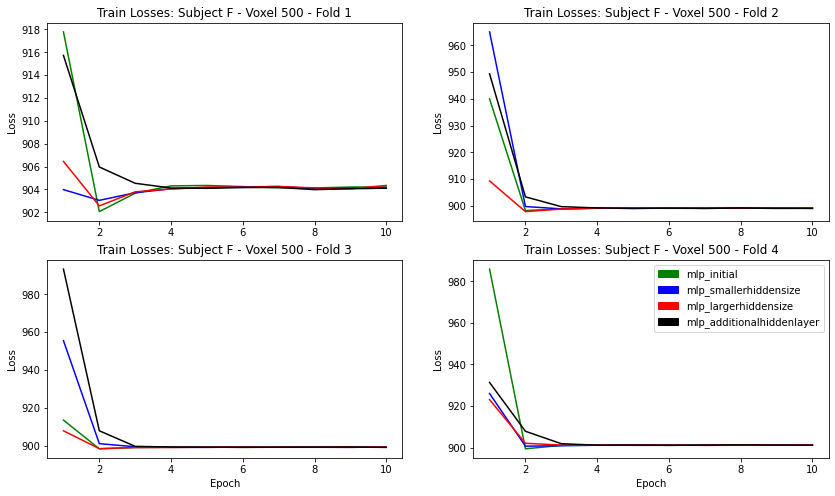

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))
for fold in range(n_folds):
    axs_x, axs_y = fold // 2, fold % 2
    axs[axs_x, axs_y].plot(X, mlp_initial_losses[fold], color='green')
    axs[axs_x, axs_y].plot(X, mlp_smallerhiddensize_losses[fold], color='blue')
    axs[axs_x, axs_y].plot(X, mlp_largerhiddensize_losses[fold], color='red')
    axs[axs_x, axs_y].plot(X, mlp_additionalhiddenlayer_losses[fold], color='black')
    axs[axs_x, axs_y].set_title('{} Losses: Subject {} - Voxel {} - Fold {}'.format(loss_type, subject, voxel_num, fold+1))

for i, ax in enumerate(axs.flat):
    if i // 2 == 0:
        ax.set(ylabel='Loss')
    else:
        ax.set(xlabel='Epoch', ylabel='Loss')

green_patch = mpatches.Patch(color='green', label='mlp_initial')
blue_patch = mpatches.Patch(color='blue', label='mlp_smallerhiddensize')
red_patch = mpatches.Patch(color='red', label='mlp_largerhiddensize')
black_patch = mpatches.Patch(color='black', label='mlp_additionalhiddenlayer')
plt.legend(handles=[green_patch, blue_patch, red_patch, black_patch])
plt.show()